# Comparison of TabPFN, TabICL and ConTextTab

In [1]:
import numpy as np
import pandas as pd
import torch
from huggingface_hub import login
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [2]:
#kaisaniemi = pd.read_csv("data/Kaisaniemi_2023-2025.csv")
#kumpula = pd.read_csv("data/Kumpula_2025.csv")
malmi  = pd.read_csv("data/Malmi_2023-2025.csv")
#df = kaisaniemi
#df = kumpula
df = malmi
df.shape

(26301, 10)

In [3]:
df = df[df["Vallitseva sää"].isin(['Heikkoa lumisadetta', 'Heikkoja vesikuuroja', 'Utua'])]
df.shape

(2629, 10)

In [4]:
X = df.drop("Vallitseva sää", axis=1)
y = df["Vallitseva sää"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

## TabPFN classifier

In [5]:
from tabpfn import TabPFNClassifier
from tabpfn.constants import ModelVersion

classifier1 = TabPFNClassifier()
classifier_tabpfn = classifier1.fit(X_train, y_train)

tabpfn-v2.5-classifier-v2.5_default.ckpt:   0%|          | 0.00/42.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

## TabICL classifier

In [6]:
from tabicl import TabICLClassifier

classifier2 = TabICLClassifier()
classifier_tabicl = classifier2.fit(X_train, y_train)

## ConTextTab classifier

In [7]:
from sap_rpt_oss import SAP_RPT_OSS_Classifier

classifier3 = SAP_RPT_OSS_Classifier(max_context_size=8192, bagging=8)
classifier_contexttab = classifier3.fit(X_train, y_train)

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


## Predictions

In [8]:
TabPFN_y_predict = classifier_tabpfn.predict(X_test)
TabPFN_y_score = classifier_tabpfn.predict_proba(X_test)

TabICL_y_predict = classifier_tabicl.predict(X_test)
TabICL_y_score = classifier_tabicl.predict_proba(X_test)

ConTextTab_y_predict = classifier_contexttab.predict(X_test)
ConTextTab_y_score = classifier_contexttab.predict_proba(X_test)


TabPFN_acc = accuracy_score(y_test, TabPFN_y_predict)
TabPFN_precision = precision_score(y_test, TabPFN_y_predict, average=None)
TabPFN_precision_micro = precision_score(y_test, TabPFN_y_predict, average='micro')
TabPFN_recall = recall_score(y_test, TabPFN_y_predict, average=None)
TabPFN_recall_weighted = recall_score(y_test, TabPFN_y_predict, average='weighted')
TabPFN_f1 = f1_score(y_test, TabPFN_y_predict, average=None)

TabICL_acc = accuracy_score(y_test, TabICL_y_predict)
TabICL_precision = precision_score(y_test, TabICL_y_predict, average=None)
TabICL_precision_micro = precision_score(y_test, TabICL_y_predict, average='micro')
TabICL_recall = recall_score(y_test, TabICL_y_predict, average=None)
TabICL_recall_weighted = recall_score(y_test, TabICL_y_predict, average='weighted')
TabICL_f1 = f1_score(y_test, TabICL_y_predict, average=None)

ConTextTab_acc = accuracy_score(y_test, ConTextTab_y_predict)
ConTextTab_precision = precision_score(y_test, ConTextTab_y_predict, average=None)
ConTextTab_precision_micro = precision_score(y_test, ConTextTab_y_predict, average='micro')
ConTextTab_recall = recall_score(y_test, ConTextTab_y_predict, average=None)
ConTextTab_recall_weighted = recall_score(y_test, ConTextTab_y_predict, average='weighted')
ConTextTab_f1 = f1_score(y_test, ConTextTab_y_predict, average=None)


print(f"accuracy (TabPFN): {TabPFN_acc}")
print(f"accuracy (TabICL): {TabICL_acc}")
print(f"accuracy (ConTextTab): {ConTextTab_acc}")

print(f"precision score (TabPFN): {TabPFN_precision}")
print(f"precision score (TabICL): {TabICL_precision}")
print(f"precision score (ConTextTab): {ConTextTab_precision}")

print(f"recall score (TabPFN): {TabPFN_recall}")
print(f"recall score (TabICL): {TabICL_recall}")
print(f"recall score (ConTextTab): {ConTextTab_recall}")

print(f"f1-score (TabPFN): {TabPFN_f1}")
print(f"f1-score (TabICL): {TabICL_f1}")
print(f"f1-score (ConTextTab): {ConTextTab_f1}")

accuracy (TabPFN): 0.8555133079847909
accuracy (TabICL): 0.8631178707224335
accuracy (ConTextTab): 0.8973384030418251
precision score (TabPFN): [0.9212963  0.83802817 0.78571429]
precision score (TabICL): [0.9478673  0.86821705 0.76344086]
precision score (ConTextTab): [0.94711538 0.8625     0.86708861]
recall score (TabPFN): [0.96601942 0.75316456 0.81481481]
recall score (TabICL): [0.97087379 0.70886076 0.87654321]
recall score (ConTextTab): [0.95631068 0.87341772 0.84567901]
f1-score (TabPFN): [0.94312796 0.79333333 0.8       ]
f1-score (TabICL): [0.95923261 0.7804878  0.81609195]
f1-score (ConTextTab): [0.95169082 0.86792453 0.85625   ]


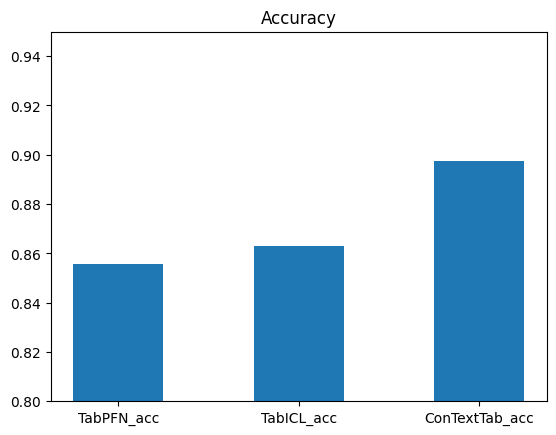

In [9]:
acc_x = np.array(["TabPFN_acc", "TabICL_acc", "ConTextTab_acc"])
acc_y = np.array([TabPFN_acc, TabICL_acc, ConTextTab_acc])
plt.bar(acc_x, acc_y, width=0.5)
plt.ylim(0.80, 0.95)
plt.title("Accuracy")
plt.show()

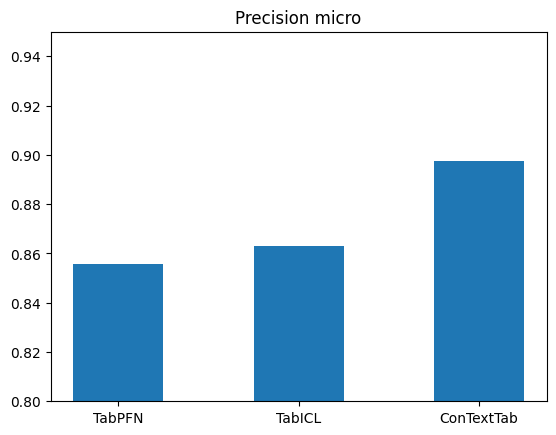

In [10]:
precision_x = np.array(["TabPFN", "TabICL", "ConTextTab"])
precision_y = np.array([TabPFN_precision_micro, TabICL_precision_micro, ConTextTab_precision_micro])
plt.bar(precision_x, precision_y, width=0.5)
plt.ylim(0.80, 0.95)
plt.title("Precision micro")
plt.show()

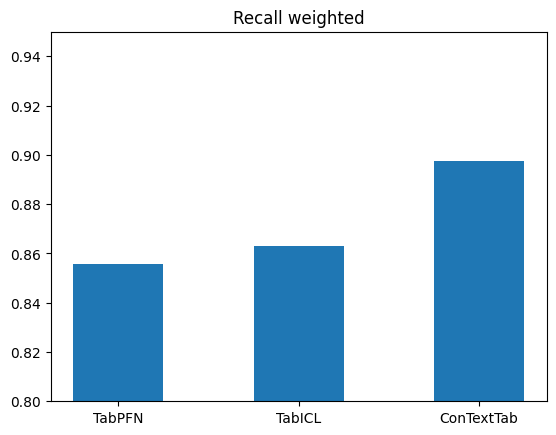

In [11]:
recall_x = np.array(["TabPFN", "TabICL", "ConTextTab"])
recall_y = np.array([TabPFN_recall_weighted, TabICL_recall_weighted, ConTextTab_recall_weighted])
plt.bar(recall_x, recall_y, width=0.5)
plt.ylim(0.80, 0.95)
plt.title("Recall weighted")
plt.show()

## One-vs-Rest multiclass ROC

In [12]:
label_binarizer = LabelBinarizer().fit(y_train)
onehot_y_test = label_binarizer.transform(y_test)

### TabPFN

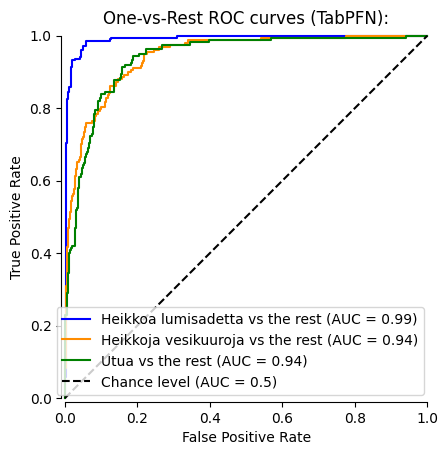

In [13]:
fig, ax = plt.subplots()
colors = ["blue", "darkorange", "green"]
classes = ["Heikkoa lumisadetta", "Heikkoja vesikuuroja", "Utua"]
for class_of_interest, color in zip(classes, colors):
    class_indices = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        onehot_y_test[:, class_indices],
        TabPFN_y_score[:, class_indices],
        name=f"{class_of_interest} vs the rest",
        curve_kwargs=dict(color=color),
        ax=ax,
        plot_chance_level=(class_indices==2),
        despine=True,
    )
_=ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves (TabPFN):",
)

### TabICL

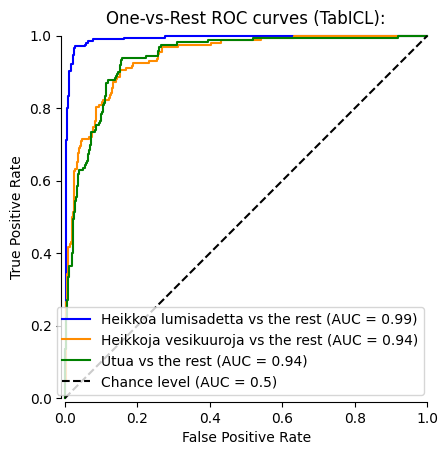

In [14]:
fig, ax = plt.subplots()
colors = ["blue", "darkorange", "green"]
classes = ["Heikkoa lumisadetta", "Heikkoja vesikuuroja", "Utua"]
for class_of_interest, color in zip(classes, colors):
    class_indices = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        onehot_y_test[:, class_indices],
        TabICL_y_score[:, class_indices],
        name=f"{class_of_interest} vs the rest",
        curve_kwargs=dict(color=color),
        ax=ax,
        plot_chance_level=(class_indices==2),
        despine=True,
    )
_=ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves (TabICL):",
)

### ConTextTab

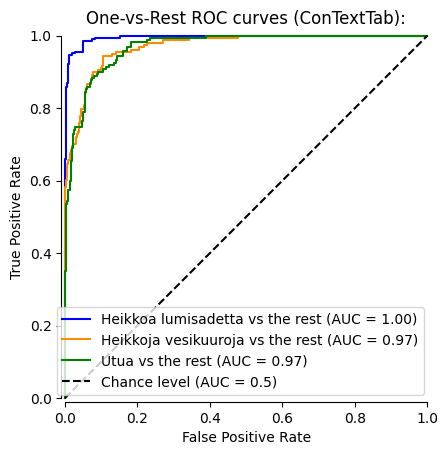

In [15]:
fig, ax = plt.subplots()
colors = ["blue", "darkorange", "green"]
classes = ["Heikkoa lumisadetta", "Heikkoja vesikuuroja", "Utua"]
for class_of_interest, color in zip(classes, colors):
    class_indices = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        onehot_y_test[:, class_indices],
        ConTextTab_y_score[:, class_indices],
        name=f"{class_of_interest} vs the rest",
        curve_kwargs=dict(color=color),
        ax=ax,
        plot_chance_level=(class_indices==2),
        despine=True,
    )
_=ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves (ConTextTab):",
)